In [1]:
import numpy as np
import pandas as pd
import h5py
import matplotlib.pyplot as plt

In [2]:
max_events = 10000

In [3]:
file_ch0 = "laser/output-wave_0.h5"
file_ch1 = "laser/output-TR_0_0.h5"
f_ch0 = h5py.File( file_ch0, 'r')
f_ch1 = h5py.File( file_ch1, 'r')
print ( f_ch0.keys() )
print ( f_ch1.keys() )

<KeysViewHDF5 ['Metadata', 'Waveform']>
<KeysViewHDF5 ['Metadata', 'Waveform']>


In [4]:
dset_ch0 = f_ch0['Waveform']
dset_metadata_ch0 = f_ch0['Metadata']
print( dset_metadata_ch0 )
print ( dset_ch0 )

dset_ch1 = f_ch1['Waveform']
dset_metadata_ch1 = f_ch1['Metadata']
print( dset_metadata_ch1 )
print ( dset_ch1 )

<HDF5 dataset "Metadata": shape (51486, 2), type "<f4">
<HDF5 dataset "Waveform": shape (51486, 1024), type "<f4">
<HDF5 dataset "Metadata": shape (51486, 2), type "<f4">
<HDF5 dataset "Waveform": shape (51486, 1024), type "<f4">


In [5]:
df_ch0 = pd.DataFrame( columns=('Event','Channel') )
df_ch0['Event']   = dset_metadata_ch0[:,0].astype('int64')
df_ch0['Channel'] = dset_metadata_ch0[:,1].astype('int64')
columns_ = [ "Ch0_" + str(i) for i in range( dset_ch0.shape[1] ) ]
df_ch0 = pd.concat( [ df_ch0, pd.DataFrame( dset_ch0, columns=columns_ ) ], axis=1 )
df_ch0 = df_ch0.set_index( 'Event' )
df_ch0 = df_ch0.iloc[:max_events]
df_ch0

,Channel,Ch0_0,Ch0_1,Ch0_2,Ch0_3,Ch0_4,Ch0_5,Ch0_6,Ch0_7,Ch0_8,...,Ch0_1014,Ch0_1015,Ch0_1016,Ch0_1017,Ch0_1018,Ch0_1019,Ch0_1020,Ch0_1021,Ch0_1022,Ch0_1023
Event,,,,,,,,,,,,,,,,,,,,,
7464,0,2692.0,2692.000000,2692.986816,2690.059814,2688.054932,2688.000000,2687.042725,2686.049805,2685.055908,...,2698.950195,2698.182861,2701.958496,2701.224609,2706.967285,2706.000000,2706.042969,2708.095215,2713.979004,2711.989258
7465,0,2686.0,2686.000000,2677.140869,2678.953125,2679.969482,2681.925049,2686.779785,2687.000000,2686.055664,...,2694.199951,2697.243896,2701.384766,2708.193604,2712.000000,2712.000000,2712.053467,2713.959717,2712.000000,2712.000000
7466,0,2690.0,2689.979736,2687.026367,2689.037842,2691.049316,2693.000000,2693.000000,2693.117432,2696.000000,...,2683.927734,2690.555664,2691.000000,2697.670654,2699.920410,2706.765137,2708.946289,2711.938721,2711.013916,2707.029297
7467,0,2690.0,2690.007568,2692.000000,2692.010010,2693.013428,2693.948242,2691.087891,2694.917236,2691.900635,...,2691.000000,2691.968018,2693.943115,2695.950195,2705.781250,2706.981201,2708.968506,2709.987793,2709.008545,2707.008789
7468,0,2688.0,2688.000000,2687.003906,2687.994629,2690.980469,2687.027832,2688.985107,2691.977295,2695.972168,...,2687.013672,2690.009033,2693.006104,2696.017090,2703.020752,2710.006592,2711.990479,2708.984375,2703.974121,2692.985840
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17459,0,2687.0,2686.998047,2685.000000,2685.007568,2686.994629,2686.007324,2687.000000,2686.988037,2686.057129,...,2692.001709,2687.006104,2693.991943,2698.994385,2699.999023,2701.997803,2701.001709,2700.001953,2702.995117,2701.002197
17460,0,2686.0,2686.000000,2685.012939,2688.921875,2688.026123,2686.067383,2687.916992,2686.098389,2689.775635,...,2687.282227,2693.217285,2698.197266,2703.141357,2707.093506,2709.814697,2702.979004,2701.984863,2701.077148,2709.033447
17461,0,2689.0,2689.000000,2689.017578,2691.012939,2691.949951,2688.979980,2688.044434,2690.047852,2691.947754,...,2690.043945,2691.918213,2701.624756,2701.033447,2702.942627,2706.904053,2702.094971,2702.986084,2703.000000,2706.980957


In [6]:
# df_ch1 = pd.DataFrame( columns=('Event','Channel','Waveform') )
# df_ch1['Event']   = dset_metadata_ch1[:,0].astype('int64')
# df_ch1['Channel'] = dset_metadata_ch1[:,1].astype('int64')
# for i in range( dset_ch1.shape[0] ):
#     df_ch1[ 'Waveform' ].iloc[ i ] = dset_ch1[ i ]
# df_ch1 = df_ch1.set_index( 'Event' )

df_ch1 = pd.DataFrame( columns=('Event','Channel') )
df_ch1['Event']   = dset_metadata_ch1[:,0].astype('int64')
df_ch1['Channel'] = dset_metadata_ch1[:,1].astype('int64')
columns_ = [ "Ch1_" + str(i) for i in range( dset_ch1.shape[1] ) ]
df_ch1 = pd.concat( [ df_ch1, pd.DataFrame( dset_ch1, columns=columns_ ) ], axis=1 )
df_ch1 = df_ch1.set_index( 'Event' )
df_ch1 = df_ch1.iloc[:max_events]
df_ch1

,Channel,Ch1_0,Ch1_1,Ch1_2,Ch1_3,Ch1_4,Ch1_5,Ch1_6,Ch1_7,Ch1_8,...,Ch1_1014,Ch1_1015,Ch1_1016,Ch1_1017,Ch1_1018,Ch1_1019,Ch1_1020,Ch1_1021,Ch1_1022,Ch1_1023
Event,,,,,,,,,,,,,,,,,,,,,
7464,-1,2199.0,2199.000000,2199.000000,2199.000000,2198.027344,2199.929688,2200.000000,2198.099609,2198.944092,...,876.651611,870.320190,876.335083,860.475830,846.573853,833.917847,830.935364,827.968262,826.125732,838.064697
7465,8,2199.0,2199.000000,2199.000000,2200.953125,2200.030518,2199.037598,2198.043945,2200.849365,2198.166992,...,884.000000,882.963440,866.560425,858.467529,847.586609,837.763489,831.026672,831.899536,827.027588,829.013611
7466,8,2201.0,2200.993164,2200.000000,2200.000000,2199.975342,2199.000000,2199.070068,2200.960938,2200.172119,...,884.855591,878.444397,871.384094,858.611694,851.278625,837.469666,839.919373,833.143005,829.055603,829.992676
7467,8,2200.0,2200.000000,2200.006836,2201.000000,2200.973145,2199.034424,2201.000000,2200.917236,2198.099365,...,883.070251,878.159607,873.142029,867.149719,850.372070,844.112976,840.063049,833.085754,826.059509,826.995544
7468,8,2200.0,2200.000000,2200.996094,2201.994629,2201.006592,2200.006836,2200.000000,2202.977295,2203.992920,...,890.972595,884.979187,877.981445,868.982910,861.955322,846.983215,841.974365,833.990601,831.007080,834.003906
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17459,8,2201.0,2200.998047,2198.997803,2198.007568,2200.000000,2200.014648,2202.000000,2201.976074,2200.014160,...,889.000000,883.007324,870.014893,865.005737,854.011780,845.010315,836.015076,831.009888,828.004822,830.996765
17460,8,2199.0,2199.000000,2202.948242,2200.058594,2200.000000,2201.932617,2201.041504,2202.901611,2202.056152,...,879.576477,870.652283,863.118286,865.470093,850.501831,834.841125,828.957825,827.015259,828.009644,829.004150
17461,8,2201.0,2200.987549,2198.017578,2200.000000,2199.966553,2198.020020,2199.044434,2200.976074,2200.000000,...,885.780334,873.532227,870.112549,862.266602,853.258667,842.263916,838.076050,834.055847,832.018066,832.995239


In [7]:
f_ch0.close()
f_ch1.close()

In [8]:
df_all = df_ch0.join( df_ch1, how='inner', lsuffix='_ch0', rsuffix='_ch1' )
df_all

,Channel_ch0,Ch0_0,Ch0_1,Ch0_2,Ch0_3,Ch0_4,Ch0_5,Ch0_6,Ch0_7,Ch0_8,...,Ch1_1014,Ch1_1015,Ch1_1016,Ch1_1017,Ch1_1018,Ch1_1019,Ch1_1020,Ch1_1021,Ch1_1022,Ch1_1023
Event,,,,,,,,,,,,,,,,,,,,,
7464,0,2692.0,2692.000000,2692.986816,2690.059814,2688.054932,2688.000000,2687.042725,2686.049805,2685.055908,...,876.651611,870.320190,876.335083,860.475830,846.573853,833.917847,830.935364,827.968262,826.125732,838.064697
7465,0,2686.0,2686.000000,2677.140869,2678.953125,2679.969482,2681.925049,2686.779785,2687.000000,2686.055664,...,884.000000,882.963440,866.560425,858.467529,847.586609,837.763489,831.026672,831.899536,827.027588,829.013611
7466,0,2690.0,2689.979736,2687.026367,2689.037842,2691.049316,2693.000000,2693.000000,2693.117432,2696.000000,...,884.855591,878.444397,871.384094,858.611694,851.278625,837.469666,839.919373,833.143005,829.055603,829.992676
7467,0,2690.0,2690.007568,2692.000000,2692.010010,2693.013428,2693.948242,2691.087891,2694.917236,2691.900635,...,883.070251,878.159607,873.142029,867.149719,850.372070,844.112976,840.063049,833.085754,826.059509,826.995544
7468,0,2688.0,2688.000000,2687.003906,2687.994629,2690.980469,2687.027832,2688.985107,2691.977295,2695.972168,...,890.972595,884.979187,877.981445,868.982910,861.955322,846.983215,841.974365,833.990601,831.007080,834.003906
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17459,0,2687.0,2686.998047,2685.000000,2685.007568,2686.994629,2686.007324,2687.000000,2686.988037,2686.057129,...,889.000000,883.007324,870.014893,865.005737,854.011780,845.010315,836.015076,831.009888,828.004822,830.996765
17460,0,2686.0,2686.000000,2685.012939,2688.921875,2688.026123,2686.067383,2687.916992,2686.098389,2689.775635,...,879.576477,870.652283,863.118286,865.470093,850.501831,834.841125,828.957825,827.015259,828.009644,829.004150
17461,0,2689.0,2689.000000,2689.017578,2691.012939,2691.949951,2688.979980,2688.044434,2690.047852,2691.947754,...,885.780334,873.532227,870.112549,862.266602,853.258667,842.263916,838.076050,834.055847,832.018066,832.995239


In [9]:
events = df_all.index
events

Index([ 7464,  7465,  7466,  7467,  7468,  7469,  7470,  7471,  7472,  7473,
       ...
       17454, 17455, 17456, 17457, 17458, 17459, 17460, 17461, 17462, 17463],
      dtype='int64', name='Event', length=10000)

Ch0_0       2694.000000
Ch0_1       2694.000000
Ch0_2       2694.986328
Ch0_3       2695.000000
Ch0_4       2692.091064
               ...     
Ch0_1019    2701.078857
Ch0_1020    2703.978516
Ch0_1021    2703.065186
Ch0_1022    2707.022705
Ch0_1023    2709.012207
Name: 7474, Length: 1024, dtype: float64
Ch1_0       2201.000000
Ch1_1       2201.000000
Ch1_2       2199.027344
Ch1_3       2199.000000
Ch1_4       2199.969727
               ...     
Ch1_1019     843.711060
Ch1_1020     833.000000
Ch1_1021     832.853088
Ch1_1022     824.056946
Ch1_1023     829.030334
Name: 7474, Length: 1024, dtype: float64
Ch0_0        7.286226
Ch0_1        7.286226
Ch0_2        8.272554
Ch0_3        8.286226
Ch0_4        5.377290
              ...    
Ch0_1019    14.365083
Ch0_1020    17.264741
Ch0_1021    16.351411
Ch0_1022    20.308931
Ch0_1023    22.298433
Name: 7474, Length: 1024, dtype: float64
Ch1_0          0.173608
Ch1_1          0.173608
Ch1_2         -1.799048
Ch1_3         -1.826392
Ch1_4      

(0.0, 200.0)

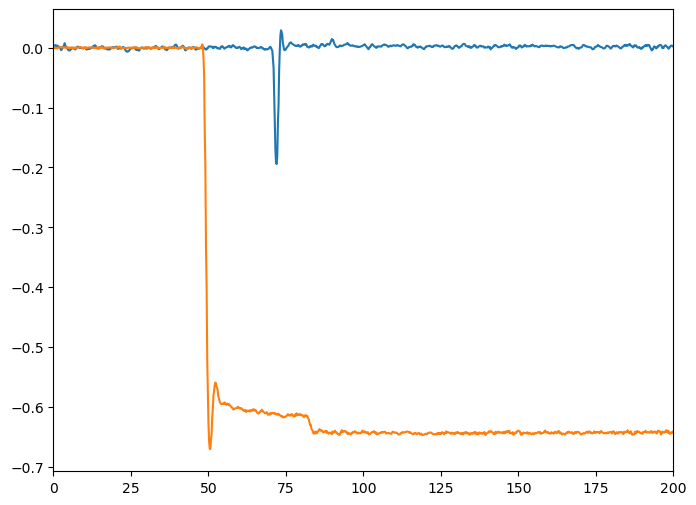

In [10]:
conv_X = 0.200 # ns
conv_Y = (2/4096)

i_evt = 10

# event_ch0 = df_all.loc[ events[ i_evt ], 'Waveform_ch0' ]
columns_ch0_ = [ "Ch0_" + str(i) for i in range( 1024 ) ]
event_ch0 = df_all.loc[ events[ i_evt ], columns_ch0_ ]
print ( event_ch0 )
columns_ch1_ = [ "Ch1_" + str(i) for i in range( 1024 ) ]
# event_ch1 = df_all.loc[ events[ i_evt ], 'Waveform_ch1' ]
event_ch1 = df_all.loc[ events[ i_evt ], columns_ch1_ ]
print ( event_ch1 )

baseline_ch0 = np.mean( event_ch0[:50] )
event_ch0_corr = event_ch0 - baseline_ch0
# event_ch0_corr = -event_ch0_corr
print ( event_ch0_corr )

baseline_ch1 = np.mean( event_ch1[:50] )
event_ch1_corr = event_ch1 - baseline_ch1
# event_ch1_corr = -event_ch1_corr
print ( event_ch1_corr )

fig = plt.figure( figsize=(8,6) )
X = conv_X * np.arange( 1024 ) 
plt.plot( X, ( event_ch0_corr * conv_Y ) )
plt.plot( X, ( event_ch1_corr * conv_Y ) )
plt.xlim(0,200)

(0.0, 200.0)

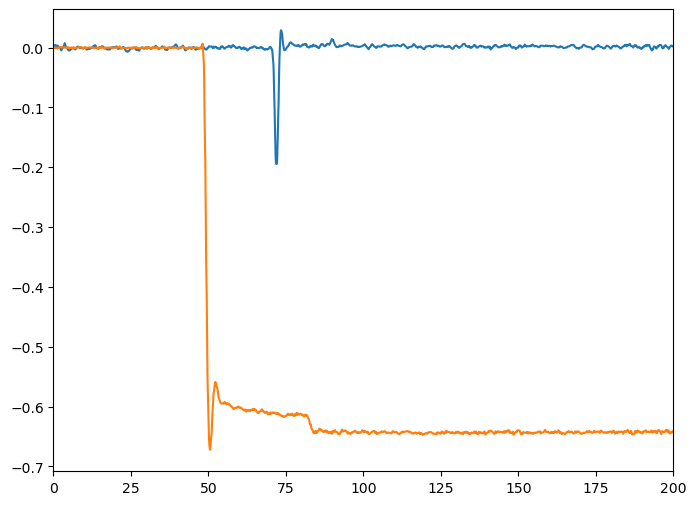

In [11]:
from scipy import interpolate

X_inter = np.linspace( X[0], X[1023], 50*len(X) )

f_ch0 = interpolate.interp1d(X, event_ch0_corr, 'cubic')
y_inter_ch0 = f_ch0( X_inter )

f_ch1 = interpolate.interp1d(X, event_ch1_corr, 'cubic')
y_inter_ch1 = f_ch1( X_inter )

fig = plt.figure( figsize=(8,6) )
plt.plot( X_inter, ( y_inter_ch0 * conv_Y ) )
plt.plot( X_inter, ( y_inter_ch1 * conv_Y ) )
plt.xlim(0,200)

In [12]:
def corr_wf( event_ ):
    baseline_ = np.mean( event_[:50] )
    event_corr_ = event_ - baseline_
    # event_corr_ = -event_corr_
    return ( event_corr_ * conv_Y )

[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190]


Text(0.5, 0, 'CH1')

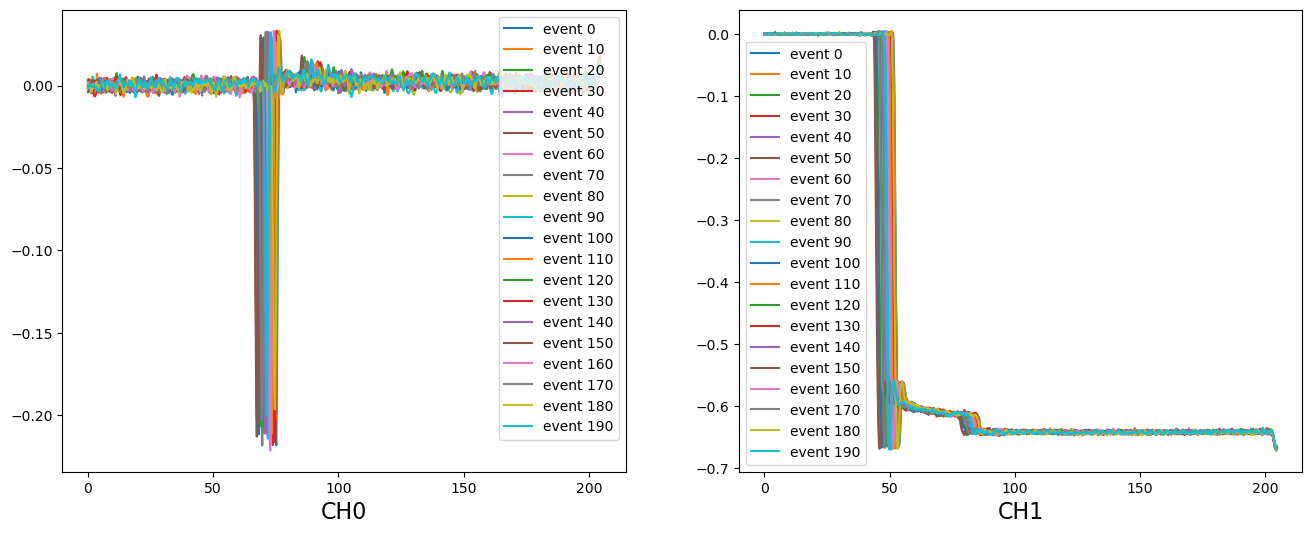

In [13]:
idx_events = range( 0, 200, 10)
print ( list( idx_events ) )

# threshold_max_0 = 200 # ADC
# threshold_max_1 = 600 # ADC
threshold_max_0 = 0.08 # V
threshold_max_1 = 0.3 # V

columns_ch0_ = [ "Ch0_" + str(i) for i in range( 1024 ) ]
columns_ch1_ = [ "Ch1_" + str(i) for i in range( 1024 ) ]
fig, axes = plt.subplots( 1, 2, figsize=(16,6) )
for i_evt_ in idx_events:    
    # event_ch0_ = df_all.loc[ events[ i_evt_ ], "Waveform_ch0" ]
    # event_ch1_ = df_all.loc[ events[ i_evt_ ], "Waveform_ch1" ]
    event_ch0_ = df_all.loc[ events[ i_evt_ ], columns_ch0_ ]
    event_ch1_ = df_all.loc[ events[ i_evt_ ], columns_ch1_ ]
    event_ch0_corr_ = corr_wf( event_ch0_ )
    event_ch1_corr_ = corr_wf( event_ch1_ )

    max_ch0_ = np.max( -event_ch0_corr_ )
    max_ch1_ = np.max( -event_ch1_corr_ )

    if ( max_ch0_ < threshold_max_0 ) or ( max_ch1_ < threshold_max_1 ): continue

    axes[ 0 ].plot( X, event_ch0_corr_, label="event {:d}".format( i_evt_ ) )
    axes[ 1 ].plot( X, event_ch1_corr_, label="event {:d}".format( i_evt_ ) )
    
axes[ 0 ].legend( loc='best' )
axes[ 0 ].set_xlabel( "CH0", fontsize=16 )
axes[ 1 ].legend( loc='best' )
axes[ 1 ].set_xlabel( "CH1", fontsize=16 )

In [14]:
run_interpolation = True
wave_threshold = 0.50 # relative
# wave_threshold_0 = 200 # ADC
# wave_threshold_1 = 600 # ADC
# wave_threshold_0 = 0.08 # V
# wave_threshold_1 = 0.3 # V

max_vals_ch0 = []
max_vals_ch1 = []
risetimes_ch0 = []
risetimes_ch1 = []

X_inter = None
if run_interpolation:
    X_inter = np.linspace( X[0], X[1023], 50*len(X) )

columns_ch0_ = [ "Ch0_" + str(i) for i in range( 1024 ) ]
columns_ch1_ = [ "Ch1_" + str(i) for i in range( 1024 ) ]
for evt_ in df_all.index:
    # event_ch0_ = df_all.loc[ evt_ , 'Waveform_ch0']
    # event_ch1_ = df_all.loc[ evt_ , 'Waveform_ch1']
    event_ch0_ = df_all.loc[ evt_, columns_ch0_ ]
    event_ch1_ = df_all.loc[ evt_, columns_ch1_ ]
    event_ch0_corr_ = corr_wf( event_ch0_ )
    event_ch1_corr_ = corr_wf( event_ch1_ )
    
    binX_ch0_ = None
    binX_ch1_ = None
    max_ch0_ = None
    max_ch1_ = None
    if run_interpolation:
        f_ch0_ = interpolate.interp1d(X, event_ch0_corr_, 'cubic')
        y_inter_ch0_ = f_ch0_( X_inter )
        f_ch1_ = interpolate.interp1d(X, event_ch1_corr_, 'cubic')
        y_inter_ch1_ = f_ch1_( X_inter )
        max_ch0_ = np.max( -event_ch0_corr_ )
        max_ch1_ = np.max( -event_ch1_corr_ )
        # Relative threshold
        binX_ch0_ = ( -y_inter_ch0_ > ( wave_threshold * max_ch0_ ) ).argmax()
        binX_ch1_ = ( -y_inter_ch1_ > ( wave_threshold * max_ch1_ ) ).argmax()
        # Absolute threshold
        # binX_ch0_ = ( -y_inter_ch0_ > ( wave_threshold_0 ) ).argmax()
        # binX_ch1_ = ( -y_inter_ch1_ > ( wave_threshold_1 ) ).argmax()
    else:
        max_ch0_ = np.max( event_ch0_corr_ )
        max_ch1_ = np.max( event_ch1_corr_ )
        # Relative threshold
        binX_ch0_ = ( -event_ch0_corr_ > ( wave_threshold * max_ch0_ ) ).argmax()
        binX_ch1_ = ( -event_ch1_corr_ > ( wave_threshold * max_ch1_ ) ).argmax()
        # Absolute threshold
        # binX_ch0_ = ( -y_inter_ch0_ > ( wave_threshold_0 ) ).argmax()
        # binX_ch1_ = ( -y_inter_ch1_ > ( wave_threshold_1 ) ).argmax()
    
    if binX_ch0_ > 0 and binX_ch1_ > 0:
        max_vals_ch0.append( max_ch0_ )
        max_vals_ch1.append( max_ch1_ )
        if run_interpolation:
            risetimes_ch0.append( X_inter[ binX_ch0_ ] )
            risetimes_ch1.append( X_inter[ binX_ch1_ ] )
        else:
            risetimes_ch0.append( X[ binX_ch0_ ] )
            risetimes_ch1.append( X[ binX_ch1_ ] )

max_vals_ch0 = np.array( max_vals_ch0 )
max_vals_ch1 = np.array( max_vals_ch1 )
risetimes_ch0 = np.array( risetimes_ch0 )
risetimes_ch1 = np.array( risetimes_ch1 )

print ( max_vals_ch0 )
print ( max_vals_ch1 )
print ( risetimes_ch0 )
print ( risetimes_ch1 )
print ( len(risetimes_ch0) )
print ( len(risetimes_ch1) )

[0.21817477 0.20488456 0.22308085 ... 0.20708901 0.21378831 0.20003539]
[0.6707286  0.67008784 0.66980144 ... 0.66804255 0.67085958 0.66858571]
[74.52860407 69.26564581 73.08998223 ... 70.07287252 73.48959941
 67.595246  ]
[52.44975488 47.23874685 51.02711772 ... 48.00201566 51.41474638
 45.56834704]
10000
10000


[22.0788492  22.02689896 22.06286451 ... 22.07085685 22.07485302
 22.02689896]


(array([   3.,    4.,   10.,    7.,   25.,   40.,  111.,  314.,  728.,
        1528., 2196., 1781., 1395.,  898.,  529.,  244.,  121.,   39.,
          18.,    9.]),
 array([21.87104826, 21.88743257, 21.90381687, 21.92020118, 21.93658548,
        21.95296978, 21.96935409, 21.98573839, 22.0021227 , 22.018507  ,
        22.03489131, 22.05127561, 22.06765992, 22.08404422, 22.10042852,
        22.11681283, 22.13319713, 22.14958144, 22.16596574, 22.18235005,
        22.19873435]),
 <BarContainer object of 20 artists>)

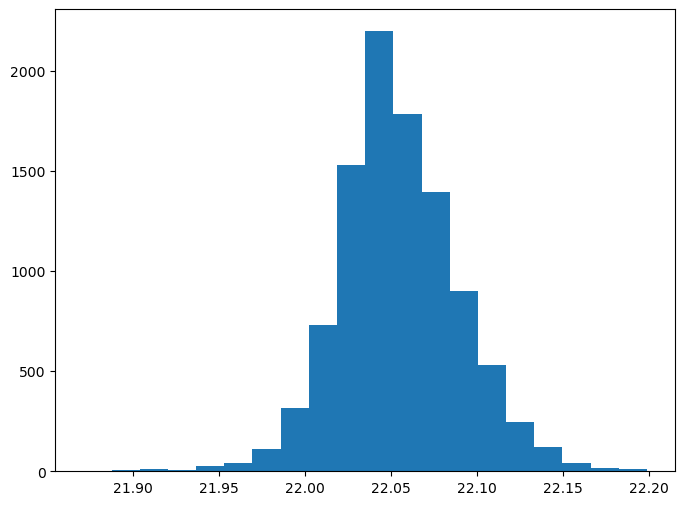

In [15]:
fig = plt.figure( figsize=(8,6) )
diff_times = ( risetimes_ch0 - risetimes_ch1 )
print ( diff_times )
plt.hist( diff_times, bins=20 )

In [16]:
print ( np.std( diff_times ) )

0.03537070262893365
